In [1]:
import pandas as pd
import numpy as np

# Handling Date and Time

Pandas is chock full of methods that allow you to handle and manipulate time and date we will cover the following
* datetime foundations in pure Python and Numpy
* the pandas Timestamp and DatetimeIndex
* up- and down-sampling with `resample()` and `asfreq()`
* interpolation and aggregation
* rolloing windows and moving averages

Time series data is handled as regular Series and Dataframe objects, which is good because our previous knowledge will easy transfer.

## The Python *datetime* Module

Python has a built-in module called `datetime` that allows you to work with dates and times. However it is not in the default namespace, so it has to be imported.

* https://docs.python.org/3/library/datetime.html

We'll be covering:
* the "what" and "why" of the datetime module
* the `date` class
* the `time` class
* the `datetime` class

Let's start by importing the date and time classes from the datetime module.


In [2]:
from datetime import date, time

Using date, we can create Python objects that create date information. Date information is characterized by year - month - date

In [3]:
date_A = date(2020, 4, 25)

In [4]:
date_A

datetime.date(2020, 4, 25)

In [5]:
type(date_A)

datetime.date

Why would we want to make such an objects, as opposed to storing dates in, for example, a plain string? The biggest reason is that the `date` object is much more easily manipulated, combined, changed, or updated with a suite of methods designed specifically for working with dates. This unlocks a lot of functionality that would be difficult to replicate using just strings, because strings have no date-specific methods.

Let's check out some of the **date attributes**, such as `.day` and `.year`

In [6]:
date_A.day

25

In [7]:
date_A.year

2020

Now let's take a look at the time class, which stores date in hour - minute - second - microsecond
* If you omit one or more of these attributes, Python will default them to 0.

In [8]:
time_A = time(4, 30, 12, 943212)

In [9]:
time_A

datetime.time(4, 30, 12, 943212)

In [10]:
time_B = time(6)

In [11]:
time_B

datetime.time(6, 0)

Time also has dedicated attributes:

In [12]:
time_B.microsecond

0

Both the **date** and **time** classes have methods associated with them as well. One of them, `isoformat()`, will return a string representing the date in ISO 8601 format, which is YYYY-MM-DD

In [13]:
time_A.isoformat()

'04:30:12.943212'

The datetime module also has a `datetime` class

In [14]:
from datetime import datetime

The `datetime` class is a standalone container that combines and stores attributes from both date and time objects, thus storing information from both the date and the time.

In [15]:
dt_A = datetime(2020, 4, 25, 19, 1, 23, 123123)

In [16]:
dt_A

datetime.datetime(2020, 4, 25, 19, 1, 23, 123123)

We can also ask Python to construct a new datetime object capturing a precise point in time. One example is the `.now()` method, which generates a datetime object for that precise moment.

In [17]:
datetime.now()

datetime.datetime(2021, 11, 23, 4, 52, 7, 122389)

We can extract attributes from datetime objects:

In [18]:
dt_A.year

2020

In [19]:
dt_A.microsecond

123123

We can also print it all, giving us a nice visual of the datetime.

In [20]:
print(dt_A)

2020-04-25 19:01:23.123123


In [21]:
print(datetime.now())

2021-11-23 04:52:07.334314


## Parsing Dates from Text with `strptime()`

Oftentimes we will not have datetime objects already made for us. Rather, we will have to work with raw text (strings) and will need to tease out or convert this text into dates. 

So, what do we do if we don't have date objects? It turns out that the `datetime` module has a method dedicated to extracting dates out of text called `strptime` (or string parse time)
* https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

It takes two arguments: the string containing that datetime that we want to parse, and the format that the date-like or time-like text is going to be expressed in. The latter makes use of format codes for the individual items that can be viewed in the link above.

In [22]:
datetime.strptime('2019-10-31','%Y-%m-%d')

datetime.datetime(2019, 10, 31, 0, 0)

Notice how this method converts our text into a datetime object that we can now work with. Let's save it as a variable.

In [23]:
dt_B = datetime.strptime('2019-10-31','%Y-%m-%d')

In [24]:
dt_B.year

2019

In [25]:
dt_B.isoformat()

'2019-10-31T00:00:00'

Going back to the conversion step, we defined the structure of the date using the **format codes**. Don't be scared by these, they are simply well-defined codes for how to describe the different datetime elements.

Let's try another example, with a future date and completely different formatting.

In [26]:
try_this = "jan 20 2090 4pm"

Our previous format code will not work when using `datetime`. The format of the format codes is not consistent with the datetime implied by our string.

In [27]:
## Results in a ValueError: time data 'jan 20 2090 4pm' does not match format '%Y-%m-%d'
# datetime.strptime(try_this, '%Y-%m-%d')

This means we need to define a new format structure using the format codes. The task now is to scan the format codes table and determine which ones to use for our datetime string.

Important note: the spacing in the format string is critical. It must mirror the spacing in the string, and must account for any extraneous or excess characters.

In [28]:
datetime.strptime(try_this, '%b %d %Y %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

And there you have it, we've successfully parsed dates using the `strptime` module.

## An Even Better Way To Parse Dates and Times: `dateutil`

The `strptime` method works great, but it's a bit laborious because one has to utilize those pesky format codes. There are alternatives to this, and one of the most popular is `dateutil`. It is external to the Python standard library, but it is included in most data science distributions, such as Anaconda and the Colaboratory.

In [29]:
pip show python-dateutil

Name: python-dateutil
Version: 2.8.2
Summary: Extensions to the standard Python datetime module
Home-page: https://github.com/dateutil/dateutil
Author: Gustavo Niemeyer
Author-email: gustavo@niemeyer.net
License: Dual License
Location: /usr/local/lib/python3.7/dist-packages
Requires: six
Required-by: pandas, matplotlib, LunarCalendar, kaggle, jupyter-client, holidays, fbprophet, bokeh


If for some reason you need to install it, you can use the following command (colab already has it installed, so it will not be installed)

In [30]:
pip install python-dateutil

Let's get to using it. The heavy lifting will be done with the `parser` class, which we have to import from `dateutil`.

In [31]:
from dateutil import parser

The beauty of using `parser` is that we can easily convert text to dates *without* needing to define the structure of the date.

In [32]:
parser.parse('Jan 21st 1990')

datetime.datetime(1990, 1, 21, 0, 0)

That's incredible. Let's try another example with something absolutely insane.

In [33]:
parser.parse('22 apriL 2068 at 4pm and 17 minutes 20 seconds')

datetime.datetime(2068, 4, 22, 16, 17, 20)

Are you freaking kidding me?! That's awesome. The dateutil parser has a very forgiving mechanism of action and is quite powerful. However, it's always a good idea however to double-check and make sure the parser did what you wanted it to do.

The `dateutil` package has many other methods as well, but the instructor finds that `parser` is among the most useful.
* https://dateutil.readthedocs.io/en/stable/parser.html

## Going from Datetime to String using `strftime()`

We've seen how to convert dates and times from strings to datetime objects using `strptime()` and dateutil's `parser.parse()`. But how do we go the other way around and convert our datetime objects into strings? In this lecture we'll learn exactly how.

The first method is `strftime()`, which works very similarly to `strptime()` but does the exact opposite. It takes a datetime object and converts it into a string. 
* https://docs.python.org/3/library/datetime.html#datetime.date.strftime

To illustrate, let's start with a new datetime object where we capture the exact moment in time when we execute it.

In [34]:
dt = datetime.now()

In [35]:
dt

datetime.datetime(2021, 11, 23, 4, 52, 14, 259990)

Now we'll use `strftime()` and format codes to create a string of our design. All you need to do is stick your format code into the string template that you provide, and the method takes care of the rest.

Suppose we just want to get the year into a string. We can do that very easily.

In [36]:
dt.strftime('%Y')

'2021'

We have full control of how we structure our string. We can throw in a month, day, and extra text if we so choose.

In [37]:
dt.strftime('Year: %Y; Month: %m; Day: %d')

'Year: 2021; Month: 11; Day: 23'

Let's do one better and try to represent our datetime fully with a single format code. For this we can use `%c`, which captures the day, month, year, and time.

In [38]:
dt.strftime('%c')

'Tue Nov 23 04:52:14 2021'

That's great - we got a very nicely formatted string with minimal formatting code.

There is another way of converting dates to custom string representation that works a bit differently. We start with a string that embeds a format code, such that the formatted datetime string is now embedded within our wider string. We can do this with old-school `.format()` string formatting.

In [39]:
"My date is {:%c}".format(dt)

'My date is Tue Nov 23 04:52:14 2021'

## Datetimes with **Numpy**

Sometimes we need to manipulate large arrays of dates and times. The pure Python approach is not appropriate for this. Numpy has created a special datatype, `datetime64`, that encodes and stores datetime information more efficiently, allowing data scientists to conduct large-scale operations on dates.
* https://numpy.org/doc/stable/reference/arrays.datetime.html

Let's start by building a datetime64 object using some arbitrary date. As the name implies, Numpy encodes these values as 64-bit integers.


In [40]:
np.datetime64('2020-03-04')

numpy.datetime64('2020-03-04')

And let's assign it to a variable.

In [41]:
a = np.datetime64('2020-03-04')

And we'll create a second datetime64 variable capturing the current date and time.

In [42]:
b = np.datetime64(datetime.now())

In [43]:
b

numpy.datetime64('2021-11-23T04:52:14.360222')

Now that we have these two datetime64 objects, we can conduct operations on them.

We can do things like add days to a date.

In [44]:
a + 10

numpy.datetime64('2020-03-14')

What if we add 10 to the other date? What will it do?

In [45]:
b + 10

numpy.datetime64('2021-11-23T04:52:14.360232')

Interestingly, this command added 10 the microseconds counter for our "b" variable. The reason this is happening is that our two numpy datetime64s have two fundamentally different time units. "a" has a unit of day, as the lowest level of precision encoded. So when we add 10, we get 10 more days. But "b" has the microsecond time unit as the lowest level of precision, so when we add 10, we get 10 more microseconds.

We can change the time unit by rescaling the numpy datetime.

In [46]:
np.datetime64(b, "D")

numpy.datetime64('2021-11-23')

Now when we add 10, we'll get 10 more days instead of 10 more microseconds.

In [47]:
np.datetime64(b, "D") + 10

numpy.datetime64('2021-12-03')

Keep in mind that the numpy datetime64 type is fixed length at 64 bits, but by changing the time unit, we change the precision of our dates. When we lower the precision as we did for "b" above, we increase the timestamp. In other words, the range of dates that we can possibly increase in numpy increases. There is a tradeoff between precision and span.

datetime64 objects allow us to perform efficient vectorized operations on a collection of dates - **vectorized ops**. Let's create an array of dates.

In [48]:
np.array([
          '2019-02-20',
          '2019-06-20',
          '2090-03-23'
], dtype = np.datetime64)

array(['2019-02-20', '2019-06-20', '2090-03-23'], dtype='datetime64[D]')

Let's analyze the above. We created a numpy array by passing in a Python list of dates. By specifying the dtype as `np.datetime64`, the method parses those dates as `datetime64` objects. Notice also how the time unit is day (the capitalized D). 

Let's assign this to a variable that we can work with.

In [49]:
dates = np.array([
          '2019-02-20',
          '2019-06-20',
          '2090-03-23'
], dtype = np.datetime64)

Now we can do things like subtract dates from each day in the array very quickly and efficiently.

In [50]:
dates - 10

array(['2019-02-10', '2019-06-10', '2090-03-13'], dtype='datetime64[D]')

We can do more complicated calculations, like getting the business day that falls 10 days before each of the dates in the array. This specific task can be accomplished using the `numpy.busday_offset()` method.
* https://numpy.org/doc/stable/reference/generated/numpy.busday_offset.html#numpy.busday_offset

In [51]:
np.busday_offset(dates, offsets = -10, roll = 'backward')

array(['2019-02-06', '2019-06-06', '2090-03-09'], dtype='datetime64[D]')

We can spend a whole course talking about how Numpy handles datetimes, but we're exploring Numpy as a stepping stone to understanding how Pandas handles datetimes. The key takeaway is that Numpy has very powerful methods that make handling datetimes much easier than using pure Python methods, as great as they are.

## The Pandas Timestamp

We are now ready to introduce the Pandas timestamp. It combines the simplicity and intuition of Python and the performance and rich interface of Numpy. Let's begin!

Suppose we have a date in mind and it comes in the form of a string.

In [52]:
"4th of July 1776"

'4th of July 1776'

How do we convert this into timestamp. Easy - we send it into the `pd.Timestamp()` function. 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
* The above link also includes the attributes and methods associated with Timestamp

In [53]:
pd.Timestamp("4th of July 1776")

Timestamp('1776-07-04 00:00:00')

And that's it! How easy was that? `pd.Timestamp()` actually behaves very similarly to `dateutil` in that it has very forgiving syntax recognition.

In [54]:
pd.Timestamp("04-JUL-1776 at 8:00am")

Timestamp('1776-07-04 08:00:00')

Keep in mind that there may be some ambiguity for some date strings simply because different regions have different default ways of representing dates. The ambiguity will exist in instances where the first value is 12 or smaller, as it could indicate a day or a month. For instance, the following string gives a Timestamp object indicating April 7, 1776 instead of July 4, 1776:

In [55]:
pd.Timestamp("4/7/1776")

Timestamp('1776-04-07 00:00:00')

To fix this, we can use the `pd.to_datetime()` method and set the `dayfirst` parameter to `True`, thereby specifying that the day comes first. Note that this method also creates a Timestamp object since the input is a scalar. It can also return a DateTimeIndex or a datetime64 Series, depending on the input.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [56]:
pd.to_datetime("4/7/1776", dayfirst = True)

Timestamp('1776-07-04 00:00:00')

Note that when the leading value in an NN/NN/YYYY formatted date is 13 or greater, the ambiguity is resolved because there are only 12 months.

So what is **Timestamp** in practical terms? Simply put, it is the fundamental building block of all datetime operations in Pandas. Let's examine some of its attributes and methods. 

In [57]:
pdts = pd.to_datetime("4/7/1776", dayfirst = True)

We can do things like extract the name of the day:

In [58]:
pdts.day_name()

'Thursday'

How many days are in that month?

In [59]:
pdts.days_in_month

31

And what quarter of the year did that date fall into?

In [60]:
pdts.quarter

3

We can also represent this date in a 3-item tuple using the `isocalendar()` method.

In [61]:
pdts.isocalendar()

(1776, 27, 4)

## Our New Dataset: Brent Prices

Let's now start working with a new dataset so we can explore our new techniques before moving on to more advanced topics.

This dataset will focus on oil prices. There are multiple types of crude oil. The **Brent crude** is one of the benchmarks that can be used to describe crude oil. There are also others all over the world. But in this lecture, we'll look a long series of oil prices going back nearly two decades.

https://andybek.com/pandas-oil

In [62]:
oil_url = 'https://andybek.com/pandas-oil'

In [63]:
brent = pd.read_csv(oil_url)

In [64]:
brent.head()

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77


In [65]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.5+ KB


Structurally, the dataset is not too complicated. It contains a long sequence of dates (in string form) alongside prices for Brent crude oil in *float64*.

## Date Parsing and DatetimeIndex

The dataframe we imported doesn't contain Timestamp or datetime objects in the "Date" column. This means we have to convert these to actual dates.

In [66]:
brent.dtypes

Date      object
Price    float64
dtype: object

In [67]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 362.6 KB


Indeed, we're only occupying about 362 Kb of memory, which isn't much. Let's keep that in mind.

Next, we'll go ahead and convert the "Date" column to datetime so that we can harness all of the date-specific functionality. We'll do this by casting the "Date" data into np.datetime64, creating a column of numpy datetime64 datatypes

In [68]:
brent['Date'] = brent.Date.astype(np.datetime64)

In [69]:
brent.head()

,Date,Price
0,2000-01-04,23.95
1,2000-01-05,23.72
2,2000-01-06,23.55
3,2000-01-07,23.35
4,2000-01-10,22.77


Now let's look at dtypes again to confirm the conversion.

In [70]:
brent.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

And how about that memory usage? Any change there?

In [71]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


Notice how much less memory we're using for this dataframe now that the dtype in the "Date" column is datetime64. This ~70% reduction in memory utilization isn't too consequential here, but if we were working with a massive dataset, it could make a big difference. The `datetime` datatype is much more efficiently stored in memory than the `object` datatype.

Moving on, let's set the newly-converted date column to be the index of our dataframe.

In [72]:
brent.set_index("Date", inplace = True)

In [73]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


What does this index look like?

In [74]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

Note how this is a `DatetimeIndex` object, a special immutable Pandas data structure that we can think of as a collection of Pandas timestamps. If we start with a collection of dates and cast the array to the `pd.to_datetime()` function, the end result is actually a DatetimeIndex.

In [75]:
pd.to_datetime(['3 june 2020', 'jun 20 2030'])

DatetimeIndex(['2020-06-03', '2030-06-20'], dtype='datetime64[ns]', freq=None)

We don't normally work with DatetimeIndex objects outside of using them in Pandas dataframes.

To wrap up, the DatetimeIndex not only contains a sequence of dates and timestamps, but also attributes of its own like `name`, `length` and `freq`. See the link below for a full list of DatetimeIndex attributes and methods.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

## A Cool Shortcut: `read_csv()` with `parse_dates`

In the previous lecture, we imported a dataframe, parsed the date column, then reassigned as the index.

There is another way to achieving the exact same result, but doing so during the initial import. It turns out that we can identify the index AND parse the dates at the moment we import the data into Pandas!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

But first, recall the classic import:

In [76]:
pd.read_csv(oil_url)

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
...,...,...
5011,24-Sep-19,64.13
5012,25-Sep-19,62.41
5013,26-Sep-19,62.08
5014,27-Sep-19,62.48


But if we utilize the `index_col` parameter, we can set the date column as the index from the get-go. In this case, the "Date" column is at the 0th column index position, so we'll set `index_col=0`. Note that we could have also used the name of the column.

In [77]:
pd.read_csv(oil_url, index_col=0)

,Price
Date,
04-Jan-00,23.95
05-Jan-00,23.72
06-Jan-00,23.55
07-Jan-00,23.35
10-Jan-00,22.77
...,...
24-Sep-19,64.13
25-Sep-19,62.41
26-Sep-19,62.08


Great! But our Date index is still a normal index object. It is NOT a DatetimeIndex object.

In [78]:
pd.read_csv(oil_url, index_col=0).index

Index(['04-Jan-00', '05-Jan-00', '06-Jan-00', '07-Jan-00', '10-Jan-00',
       '11-Jan-00', '12-Jan-00', '13-Jan-00', '14-Jan-00', '17-Jan-00',
       ...
       '17-Sep-19', '18-Sep-19', '19-Sep-19', '20-Sep-19', '23-Sep-19',
       '24-Sep-19', '25-Sep-19', '26-Sep-19', '27-Sep-19', '30-Sep-19'],
      dtype='object', name='Date', length=5016)

This means Pandas does not recognize these as dates, but as regular strings. As such, we wont be able to utilize the attributes and methods available to DatetimeIndex objects.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

Luckily, `read_csv()` has another parameter called `parse_dates()`, which we can set to `True`. This will cause Pandas to try to parse dates from our index values.

In [79]:
pd.read_csv(oil_url, index_col=0, parse_dates=True)

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [80]:
pd.read_csv(oil_url, index_col=0, parse_dates=True).index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

We now have a DatetimeIndex! Let's set this as a new variable *brent2*

In [81]:
brent2 = pd.read_csv(oil_url, index_col=0, parse_dates=True)

In [82]:
brent2.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


The `parse_dates` parameter is clearly much more elegant than performing the parse on our own. However, it is dependent upon the data being well-formed of good quality.

## Indexing Dates and Partial String Indexing

Just like any other index, a DatetimeIndex can be indexed and selected from. 

Let's start with label-based indexing using the `loc[]` indexer. Suppose we want to select a specific date, *Jan 3rd 2017*. We can do the following.

In [83]:
brent.loc['2017-01-03']

Price    55.05
Name: 2017-01-03 00:00:00, dtype: float64

How about a range of prices spanning a particular period of dates? We can use a slice for that. Let's select pricrs from January 3rd to January 6th

In [84]:
brent.loc['2017-01-03':'2018-01-06']

,Price
Date,
2017-01-03,55.05
2017-01-04,54.57
2017-01-05,54.99
2017-01-06,55.90
2017-01-09,54.39
...,...
2017-12-29,66.73
2018-01-02,66.65
2018-01-03,67.85


A special aspect of DatetimeIndex indices is that we can use partial string indexing
* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#partial-string-indexing

For instance, say we want to select all prices from Jan 2019. One way to do this is to simply slice from January 01 to January 31. 

In [85]:
brent.loc['2019-01-01':'2019-01-31']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


However, DatetimeIndex allow for a more elegant syntax as follows:

In [86]:
brent.loc['2019-01']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


How neat is that! This *partial string indexing* is extremely powerful. For example, we can combine partial strings to get slices. 

Suppose we want the prices for the first two months of 2019. All we have to do is this:

In [87]:
brent.loc['2019-01':'2019-02']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


The slices don't even need to be symmetric or similarly shaped. We can provide a partial string for one end of a slice and a full string on the other. For example, suppose we want the prices from July 2019 to mid August 2019. We do the following:

In [88]:
brent.loc['2019-07':'2019-08-15']

,Price
Date,
2019-07-01,65.10
2019-07-02,62.72
2019-07-03,63.53
2019-07-04,63.62
2019-07-05,64.23
2019-07-08,64.89
2019-07-09,64.30
2019-07-10,66.41
2019-07-11,67.64


As a final note, we can do plain square indexing instead of using the `loc[]` indexer. However, the instructor recommends using the `loc[]` when indexing because it signals our intent much more clearly.

## Skill Challenge #1

#### 1. Using the *brent* time series, create a shorter dataframe that only contains the prices from 1 Dec 2015 through 31 March 2016

This is a simply selection using `loc[]`.

In [89]:
brent.loc['2015-12-01':'2016-03-31']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


#### 2. Repeat the above, but this time use partial string indexing instead of specifying full dates. Determine the standard deviation of prices during this period.

Because we're selecting from the first day of December to the final day of March, this can easily be done with partial string indexing as follows.

In [90]:
brent.loc['2015-12':'2016-03']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


We could have used other syntax as well, owing to the flexibility of DatetimeIndex selection. For example:

In [91]:
brent.loc['12/2015':'03/2016']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


To calculate the standard deviation of the prices during this period, we simply tack on a call to the `std()` method.

In [92]:
brent.loc['2015-12':'2016-03'].std()

Price    3.990123
dtype: float64

#### 3. Calculate the mean price from February 2018 to the median price from March 2017. Which was greater?

Let's take care of all this in one fell swoop. We'll do a `loc[]` selection on Feb 2018, calculate the mean, and compare it using a boolean operator to a `loc[]` selection of March 2017 where we calculate the median.

In [93]:
brent.loc['2018-02'].mean() >= brent.loc['2018-03'].median()

Price    True
dtype: bool

Thus, the mean price from February 2018 was higher than the median price from March 2017. Let's look at the actual values.

In [94]:
brent.loc['2018-02'].mean(), brent.loc['2018-03'].median()

(Price    65.3175
 dtype: float64, Price    65.19
 dtype: float64)

It was quite close! Feb 2018 had a mean price of 65.32 while March 2017 had a median price of $65.19

## DatetimeIndex Attribute Accessors

Let's talk more about the DatetimeIndex, more specifically the attribute accessors that are available to DatetimeIndex instances

In [95]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

One thing we can do is extract the quarter from each of our dates using `.index.quarter()`, which returns an index indicating the quarter for each date.

In [96]:
brent.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

There are similar accessors for the week, month, day of year, week of the year, and name of the day (which uses the `day_name()` method).

Here again is the link to all of the attributes and methods of the DatetimeIndex object.

In [97]:
brent.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [98]:
brent.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=5016)

In [99]:
brent.index.dayofyear

Int64Index([  4,   5,   6,   7,  10,  11,  12,  13,  14,  17,
            ...
            260, 261, 262, 263, 266, 267, 268, 269, 270, 273],
           dtype='int64', name='Date', length=5016)

In [100]:
brent.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [101]:
brent.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

We can use this for any field we want. For instance, our current dataframe is a single sequence of values with Dates in the index and a single column "Price."

Suppose we were conducting some analysis on price by weekday name and we want to know which day of the week has the lowest price over the past 19 years. First we create a new column that stores the name of the day for each date in the index.

In [102]:
brent['Dayname'] = brent.index.day_name()

In [103]:
brent.head()

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday


We can now use `groupby()` to group the dates by name of the day, and tack on a `mean()` function to calculate the average price on that day of the week.

In [104]:
brent.groupby("Dayname").mean().sort_values(ascending = True, by = "Price")

,Price
Dayname,
Monday,63.875348
Friday,64.317988
Tuesday,64.493895
Wednesday,64.495593
Thursday,64.581943


Over the past 19 years, on average brent crude prices has been lowest on Mondays.

Let's now remove the "Dayname" column as we don't want it going forward.

In [105]:
brent.drop(columns="Dayname", inplace=True)

In [106]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


Another use of DatetimeIndex attributes is in the dynamic creation of boolean masks. 

Suppose we are interested in the mean (average) brent price in all *leap year Februaries* in our dataset. 
* common years in the Gregorian calendar have 365 days
* But a single orbit of the Earth around the sun takes 365 days
* Thus, every 4 years, we add an additional day to February, giving it 29 days instead of 28.

We can do the selection and mean calculation all in one go. We select for all dates from leap years using the `is_leap_year` attribute that are also in February.

In [107]:
brent[(brent.index.is_leap_year == True) & (brent.index.month == 2)]

,Price
Date,
2000-02-01,27.35
2000-02-02,27.15
2000-02-03,27.60
2000-02-04,27.48
2000-02-07,27.94
...,...
2016-02-23,31.90
2016-02-24,31.50
2016-02-25,32.83


Now all we need to do is tack on a `.mean()` calculation.

In [108]:
brent[(brent.index.is_leap_year == True) & (brent.index.month == 2)].mean()

Price    60.696634
dtype: float64

Overall, these attribute accessors are extremely powerful and allow you to select your DatetimeIndex entries very specifically.

## Creating Date Ranges: the `date_range()` Method

Date ranges can be create *de novo* using the Pandas method `pd.date_range()`
* This method is very flexible and allows you to indicate the start and end dates using various formats.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
* The method returns a DatetimeIndex object

In [109]:
pd.date_range(start='10 may 2020', end = '20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

Let's try another with different date formats

In [110]:
pd.date_range(start = '5/10/2020', end = '20 jun 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

We don't have to use `start` and `end` dates. We can identify a start date and then simply enter the number of "periods".

In [111]:
pd.date_range(start = '1/20/2020', periods = 10)

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29'],
              dtype='datetime64[ns]', freq='D')

Notice here the Pandas automatically generated a range of dates that starts on January 20 and goes to January 29, 2020, 10 days later. The silent assumption was that we wanted *daily* periods.

But we could change this behavior using the `freq` parameter. For instance, suppose we wanted the frequency of the additional days to be *weeks*. Totally doable:

In [112]:
pd.date_range(start = '1/20/2020', periods = 10, freq = "W")

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29'],
              dtype='datetime64[ns]', freq='W-SUN')

This page has a list of frequency aliases that we can use in the `freq` parameter.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

The `freq` parameter also supports multiples. For example, if we wanted to dates for every 2 weeks, we can do the following:

In [113]:
pd.date_range(start = '1/20/2020', periods = 10, freq = "2W")

DatetimeIndex(['2020-01-26', '2020-02-09', '2020-02-23', '2020-03-08',
               '2020-03-22', '2020-04-05', '2020-04-19', '2020-05-03',
               '2020-05-17', '2020-05-31'],
              dtype='datetime64[ns]', freq='2W-SUN')

Lastly, we can start at the end with the `end` parameter and go backwards. Suppose we wanted a datetimeIndex containing dates for the 20 months before January 2021, at a monthly frequency, we can do the following:

In [114]:
pd.date_range(end = 'jan 2021', periods = 20, freq = "M")

DatetimeIndex(['2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

The `date_range()` method can also be used to put together date-based dataframes. Let's do an example of that! We'll create a random dataframe using our 20 month end dates above with gibberish columns and data.

In [115]:
dti = pd.date_range(end = 'jan 2021', periods = 20, freq = "M")

In [116]:
pd.DataFrame(index = dti, data = np.random.randint(100, size = (20, 4)), columns = list('abcd'))

,a,b,c,d
2019-05-31,95,28,96,59
2019-06-30,3,93,41,5
2019-07-31,10,83,33,56
2019-08-31,68,97,45,23
2019-09-30,58,38,29,67
2019-10-31,74,46,3,35
2019-11-30,83,4,83,65
2019-12-31,46,75,89,24
2020-01-31,9,72,29,8
2020-02-29,76,59,69,67


## Shifting Dates with `pd.DateOffset()`

When we create datetimes, it is sometimes necessary to adjust them afterward by a given amount of time. In Pandas this kind of transformation can be done with the help of the `pd.DateOffset()` function.

Suppose we're working with a Pandas timestamp, which we'll assign to the variable `dob`, which represents the date of birth for a random racing pigeon.

In [117]:
dob = pd.Timestamp('2020-03-09')

In [118]:
dob

Timestamp('2020-03-09 00:00:00')

Now we want to figure out when the egg was laid for this particular pigeon. Given that the incubation period of pigeon eggs is about 17 days, we can figure that out. We need to subtract 18 days from the date of birth. 

Let's try to subtract 18 from the date of birth (this will NOT work):


In [119]:
## This results in a TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
# dob - 18

This error results from the ambiguity in what we are substracting. Luckily this ambiguity is easily clarified in Pandas. 

First, we create a **DateOffset** object that captures a difference of 18 days.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.DateOffset.html
* Think of this object as encapsulating how much of an offset you want.

In [120]:
pd.DateOffset(days = 18)

<DateOffset: days=18>

How let's do our arithmetic.

In [121]:
dob - pd.DateOffset(days = 18)

Timestamp('2020-02-20 00:00:00')

Success! Looks like this pigeon egg was laid on February 20, 2020.

We can specify any type of offset we want using `pd.DateOffset` by simply typing whatever temporal parameter we want.

In [122]:
pd.DateOffset(days = 4, minutes = 10, nanoseconds = 2)

<DateOffset: days=4, minutes=10, nanoseconds=2>

In [123]:
pd.DateOffset(years = 10)

<DateOffset: years=10>

Let's now apply this to our `brent` dataframe.

In [124]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


Suppose we want to modify our datetimes in the index to add a timestamp that represents the time that the market closed. We need to adjust our datetimes to account for the fact that these are closing prices as of 6:00pm on their respective days. To do this, we will add an offset of 18 hours to our dates, which at this point have their time variables default to 00:00:00

In [125]:
brent.set_index(brent.index + pd.DateOffset(hours = 18))

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


Great! The same dates are there, but now we have a time component.

## Bonus: Timedeltas and Absolute Time

In the previous lecture, we manipulated dates by creating offsets that store time differences and combining them with existing datetimeindex or timestamp objects. In this lecture, we'll do a similar thing but use the `TimeDelta` class instead.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html

At first glance, it looks quite similar to a `pd.DateOffset()` object.

In [126]:
pd.Timedelta(days = 3, hours = 4)

Timedelta('3 days 04:00:00')

Notice how similar this looks to the `DateOffset`

In [127]:
pd.DateOffset(days = 3, hours = 4)

<DateOffset: days=3, hours=4>

In fact they do operator similarly. Let's try adding this offset to the first date in our `brent` price timeseries. We'll start by isolating the first timestamp.

In [128]:
brent.iloc[0].name

Timestamp('2000-01-04 00:00:00')

Let's assign it to a variable `ts`.


In [129]:
ts = brent.iloc[0].name

Now we'll add the offset.

In [130]:
ts + pd.Timedelta(days = 3, hours = 4)

Timestamp('2000-01-07 04:00:00')

Note that this results a new Timestamp. What happens when we do this with a DateOffset?

In [131]:
ts + pd.DateOffset(days = 3, hours = 4)

Timestamp('2000-01-07 04:00:00')

Sure enough, we end up with the same timestamp. So if they do the same thing, why do they both exist in Pandas? Why don't we have just one of them?

The key difference is that timedelta operates on *absolute time*, whereas *DateOffset* operates on *calendar time*. That is, DateOffset is calendar-aware and will account for things like daylight savings time. 
* Timedelta always considers a day to be 24 hours
* DateOffset might consider a day to be 23, 24, or 25 hours, depending on the timezone and time of the year. 

Let's illustrate this difference with an example. We'll start with a pandas timestamp for March 14 2021, which is when daylight savings time begins in the USA in the year 2021.

In [132]:
dst = pd.Timestamp('march 14 2021', tz = 'US/Eastern')

In [133]:
dst

Timestamp('2021-03-14 00:00:00-0500', tz='US/Eastern')

Let's add an offset to this using DateOffset.

In [134]:
dst + pd.DateOffset(days = 1)

Timestamp('2021-03-15 00:00:00-0400', tz='US/Eastern')

This timestamp is exactly one day later at the beginning of the next day, March 15, 2021. Because DateOffset follows calendar time, it adjusted for the fact that the clock was adjusted forward one hour thanks to daylight savings time, and only added 23 hours to the timestamp instead of 24.

Let's try the same with Timedelta.

In [135]:
dst + pd.Timedelta(days = 1)

Timestamp('2021-03-15 01:00:00-0400', tz='US/Eastern')

Look at what happened here - it appears that we've shifted forward by 1 day and 1 hour. This is because Timedelta always considers a day to be 24 hours. It does not account for the fact that the clock was adjusted forward one hour and does not compensate for that. Thus, it adds 24 hours to whatever is happening "in the background" resulting in putting us an extra hour ahead thanks for the 1 hour clock adjustment.



## Resampling Timeseries with the `resample()` Method

Oftentimes we begin working with a Timeseries dataset, and find ourselves needing to change the frequency of observations in that series. For example, if we found daily prices are too noisy for our analysis, perhaps we want to change to monthly. This process of altering the frequency of a timeseries is known as **resampling**. Pandas has a convenient method for changing sampling frequencies of time series known as `resample()`.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

Let's do the proposed change - downsampling form days to months. We do this by calling resample on the dataframe and apssing in an offset alias representing how we want to resample.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [136]:
brent.resample('M')

This creates a `resample.DatetimeIndexResampler` object. This object is very similar to a DataframeGroupBy object. Intuitively, our daily brent prices have been grouped in monthly collections, and it is waiting for us to tell Pandas what method to apply.

Why do we need to identify a method? Well, when downsampling, we go from many data points to fewer data points and further between. Thus, Pandas needs to know what aggregate function to use to collapse these many observations into fewer observations, just like `groupby()`. 

In our example, let's start with the median, which gives us the median prices for each month. We simply tack on a `median()` method to the code.

In [137]:
brent.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


Let's get a quick visual feel of  this series as a whole. We will plot this series that we down-sampled.
* We will learn more about MatplotLib later, but one advantage of DatetimeIndex is that it will automatically treated as the x-axis by Matplotlib. 

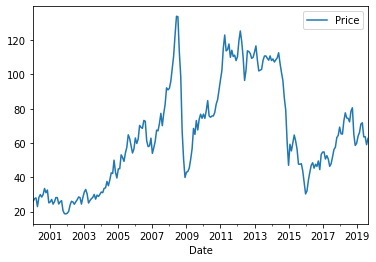

In [138]:
brent.resample('M').median().plot()

Thus, we see oil prices spiked at around 2008, dropped precipitously, and then recovered in around 2011-2013, then dropped again after that.

The contrast here sucks, so we'll import Seaborn and use that (we'll explore this later)

In [139]:
import seaborn as sns
sns.set()

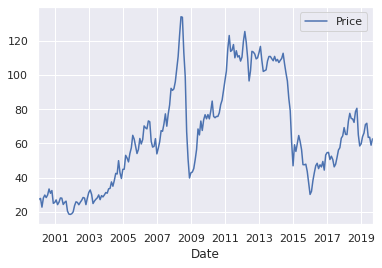

In [140]:
brent.resample('M').median().plot()

Let's change this around a bit and aggregate on a mean instead of a median.

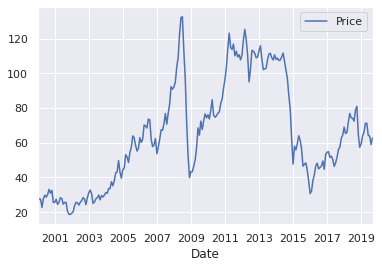

In [141]:
brent.resample('M').mean().plot()

Not a major change, if any.

How about a yearly downsample?

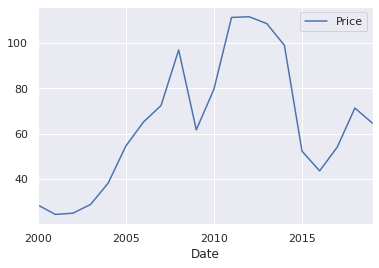

In [142]:
brent.resample('Y').mean().plot()

Check out how the shape of the graph changed here. We have far fewer observations with a yearly downsample (20 versus ~240), and so the curve is smoother and less detailed. That can be good or bad, depending on your goal and what information you are trying to convey.

What if we downsampled to every 10 days, where we calculate the 10-day averages for the prices over the timeseries?

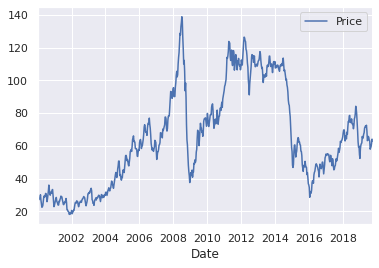

In [143]:
brent.resample('10D').mean().plot()

Now we're back to that jagged plot.

## Upsampling and Interpolation with the `interpolate()` Method

We previously used the `resample()` method to downsample our dataset using different aliases, like every month, every 10 days, etc. In this lecture, we'll do the opposite and start with a time series and *increase* its frequency of observations. This is known as **upsampling**.

In upsampling, we're going from fewer observations to many more, and our time series may not have sufficient observations to fulfill this. So what do we do to fill those gaps? Let's take a look at our dataframe.


In [144]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


We have daily price observations. What happens if we resample to 8-hour periods?

In [145]:
brent.resample('8H').mean()

,Price
Date,
2000-01-04 00:00:00,23.95
2000-01-04 08:00:00,NaN
2000-01-04 16:00:00,NaN
2000-01-05 00:00:00,23.72
2000-01-05 08:00:00,NaN
...,...
2019-09-28 16:00:00,NaN
2019-09-29 00:00:00,NaN
2019-09-29 08:00:00,NaN


Since each day has 24 hours, our upsampling results in 3 observations per day (one for each 8-hour segment). Yet, only one entry per day carries a Price datum - none of the others have any data, and instead display `NaN`. How do we solve this conundrum?

The answer is **interpolation** - we will use the data points flanking the NaN's to create new datapoints. Let's try some examples.


With **linear interpolation**, we fill the two intervening NaN values between two known values by drawing a line between the known values, then using that line to determine the values of the two intervening values.

The slope of this line, or the change in price per day, is equal to (Price2 - Price1) / Days between prices. We can then use this slope to fill in the intervening unknown price values.

Taking the example of January 4-5 from our dataframe above, we have:

In [147]:
diff = (23.72 - 23.95) / 3

Let's now calculate the price at 08:00:00 on January 4:

In [148]:
N1 = 23.95 + diff

In [150]:
N1

23.87333333333333

And the price ay 16:00:00 on January 4:

In [149]:
N2 = N1 + diff

In [151]:
N2

23.796666666666663

And finally, to get back to January 5, we can add the diff again.

In [152]:
N2 + diff

23.719999999999995

We can now say we've linearly interpolated the values between January 4 and January 5. 

Obviously nobody does this manually as we did above. Instead, we use the `resample()` method combined with the `interpolate()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.interpolate.html

In [153]:
brent.resample('8H').interpolate(method='linear')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


So in a single line of code, we have created new 8-hour periods from daily observations and plugged in with linearly-interpolated prices. 

There are also other means of interpolation, such as a polynomial spline (in this example it'll be a polynomial to the power of 3).

In [154]:
brent.resample('8H').interpolate(method='spline', order = 3)

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.013531
2000-01-04 16:00:00,23.117453
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.319619
...,...
2019-09-28 16:00:00,61.240570
2019-09-29 00:00:00,61.195778
2019-09-29 08:00:00,61.176797


And akima splines, which are typically used when the rate of change of the slope (the second derivative) is quite variable:

In [156]:
brent.resample('2H').interpolate(method='akima')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 02:00:00,23.928478
2000-01-04 04:00:00,23.907269
2000-01-04 06:00:00,23.886406
2000-01-04 08:00:00,23.865926
...,...
2019-09-29 16:00:00,61.289907
2019-09-29 18:00:00,61.217787
2019-09-29 20:00:00,61.143750


## Using the `asfreq()` Method to Change the Frequency of Observations

We saw how we can downsample and aggregate, or upsample and interpolate.

Pandas also offers the `asfreq()` method for adjusting the frequency of a time series. How does it differ from `resample()`?

Let's begin with our `brent` daily price series and use `asfreq()` to change it to 10-day periods of observation.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html

In [157]:
brent.asfreq('10D')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,NaN
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,NaN


Now we have a shorter series of dates that are 10 days apart. Note that we created some NaN values were also created. This happens when the date that is created by `asfreq()` does not have a data point associated with it in the dataset. For example, Febuary 13, 2000 was not in our dataset. Why not?

In [158]:
'2000-02-13' in brent.index

False

In [159]:
pd.Timestamp('2000-02-13').day_name()

'Sunday'

That's why - 2000-02-13 was a Sunday, and no trading happens on that day.

The `asfreq()` method has some built-in capabilities that allow us to fill in the NaN gaps. For instance, we can plug the NaN's by copying the existing values forward or backwards.

In [160]:
brent.asfreq('10D', method = 'ffill')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,27.82
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,61.04


Where did thse new numbers come from? The forward filling logic takes the preceding price and copies it forward. So in the case of February 13, 2000, the price filled here was probably from the preceding Friday. Let's confirm!

In [161]:
brent.loc['2000-02-11']

Price    27.82
Name: 2000-02-11 00:00:00, dtype: float64

Another way to fill in this values is to use the `fill_value` parameter, which replaces all NaN values with a single value. Supposed we wanted to fill ours with the mean price from the entire series. We could do the following:

In [162]:
brent.asfreq('10D', fill_value = brent.values.mean())

,Price
Date,
2000-01-04,23.950000
2000-01-14,25.500000
2000-01-24,27.020000
2000-02-03,27.600000
2000-02-13,64.358078
...,...
2019-08-12,57.130000
2019-08-22,59.810000
2019-09-01,64.358078


Another example, this time using downsampling using monthly observations.

In [163]:
brent.asfreq('M', method = 'ffill')

,Price
Date,
2000-01-31,27.08
2000-02-29,29.01
2000-03-31,23.98
2000-04-30,23.79
2000-05-31,29.64
...,...
2019-05-31,66.78
2019-06-30,67.52
2019-07-31,64.07


How was that different from resampling? Notice that the `asfreq()` method gives us a full dataframe with the Prices filled in, whereas `resample()` gives us a DatetimeIndexResample object that is waiting for an aggregate function. 

In [164]:
brent.resample("M")

In [165]:
brent.resample("M").median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


Can we apply an aggregate function to the series that was created with `asfreq()`?

In [166]:
brent.asfreq('M', method = 'ffill').median()

Price    61.35
dtype: float64

This line calculated the median of the monthly prices in our series - it did not calculate the median for each month. 

To summarize, `asfreq()` is used to *select* from the dataframe. On the other hand, `resample()` groups data in the way that we specify, and then opens those groups up to *aggregate analysis*, very similar to `groupby()`.

Both methods are useful depending on the situation and application. If you need to select from the time series according to a frequency, use `asfreq()`. If we need to condense the information according to a frequency, use `resample()`.